<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])


In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
# Display dataset info
print("Dataset Overview:\n", boston_df.head())
print("\nDataset Info:\n")
boston_df.info()
print("\nBasic Statistics:\n", boston_df.describe())

Dataset Overview:
    Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null

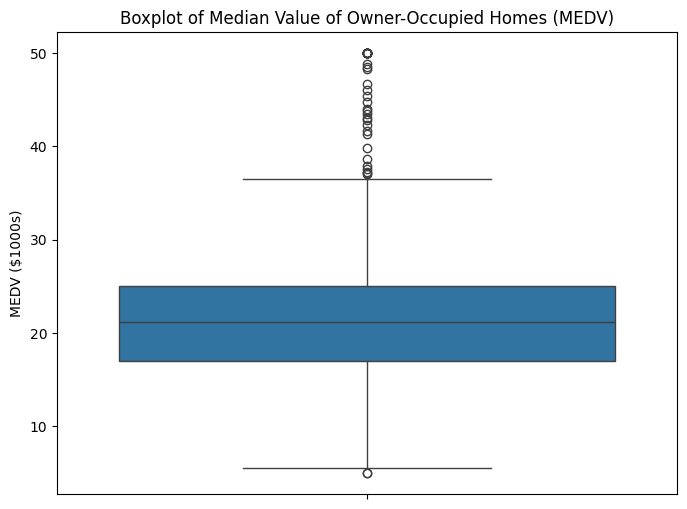

In [15]:
# Task 2: Descriptive Statistics and Visualizations
## Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

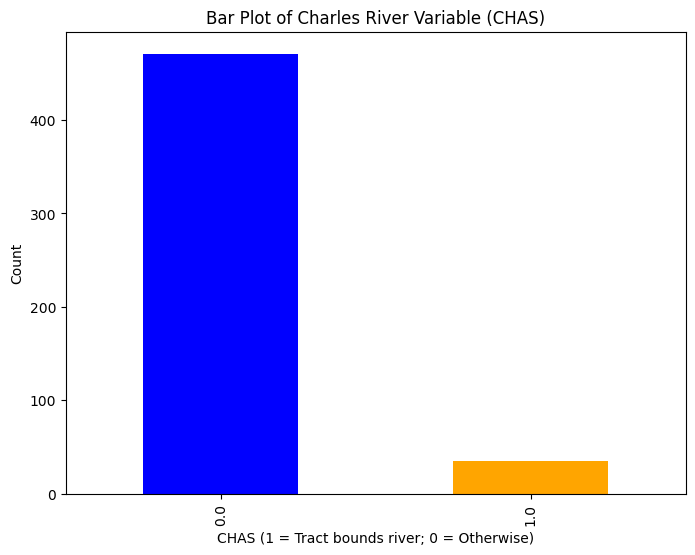

In [16]:
## Bar Plot for CHAS
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = Tract bounds river; 0 = Otherwise)')
plt.ylabel('Count')
plt.show()

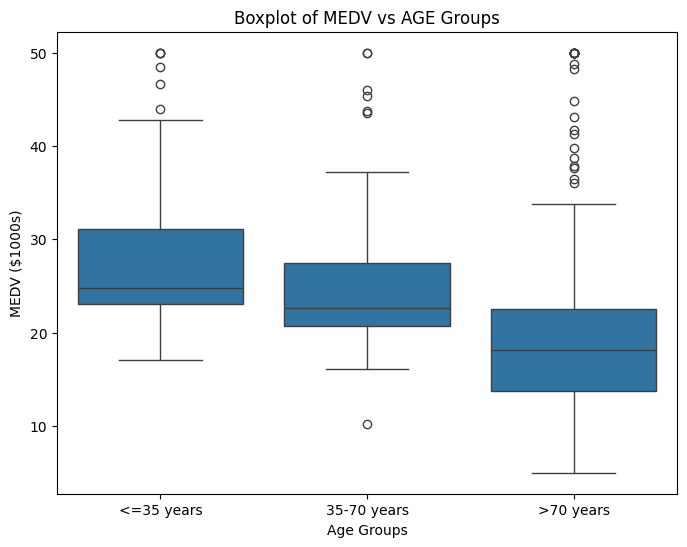

In [17]:
## Boxplot for MEDV vs AGE Groups
bins = [0, 35, 70, 100]
labels = ['<=35 years', '35-70 years', '>70 years']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('MEDV ($1000s)')
plt.show()

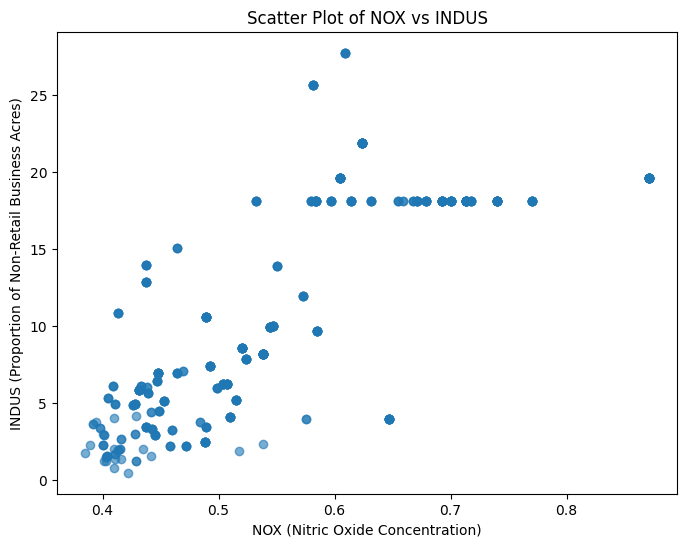

In [18]:
## Scatter Plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.6)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX (Nitric Oxide Concentration)')
plt.ylabel('INDUS (Proportion of Non-Retail Business Acres)')
plt.show()

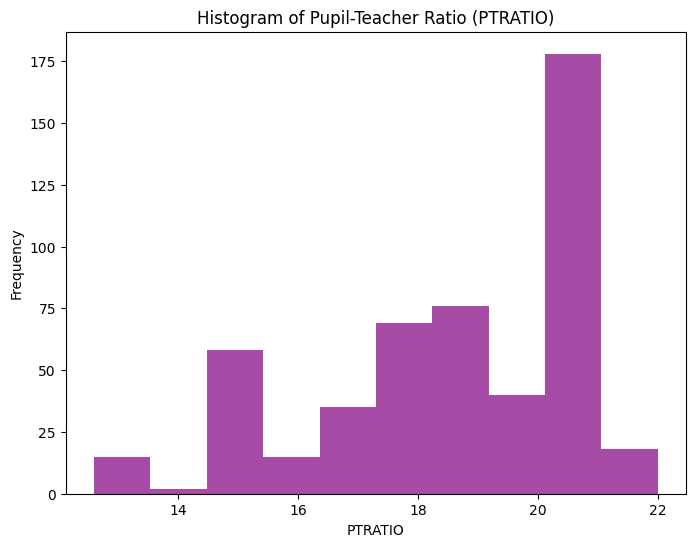

In [19]:
## Histogram for PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, color='purple', alpha=0.7)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

In [22]:

## T-Test: MEDV vs CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-Test Results:\nT-Statistic: {t_stat}, P-Value: {p_value}")

T-Test Results:
T-Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05


In [23]:
## ANOVA: MEDV vs AGE Groups
group1 = boston_df[boston_df['AGE_group'] == '<=35 years']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '>70 years']['MEDV']
anova_stat, anova_p = stats.f_oneway(group1, group2, group3)
print(f"ANOVA Results:\nF-Statistic: {anova_stat}, P-Value: {anova_p}")


ANOVA Results:
F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [24]:
## Correlation: NOX vs INDUS
corr_coeff, corr_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation Results:\nCorrelation Coefficient: {corr_coeff}, P-Value: {corr_p}")

Correlation Results:
Correlation Coefficient: 0.7636514469209192, P-Value: 7.913361061210442e-98


In [25]:
## Regression: DIS vs MEDV
X = boston_df[['DIS']]
y = boston_df['MEDV']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        23:10:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

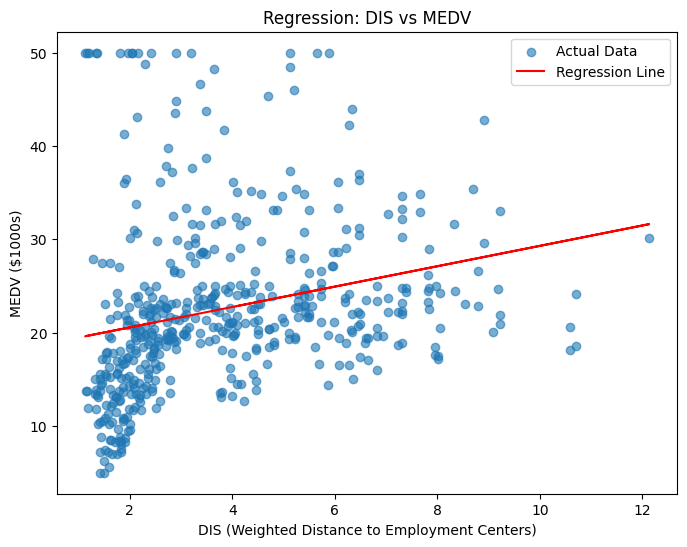

In [26]:
# Regression Plot
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.6, label='Actual Data')
plt.plot(boston_df['DIS'], model.predict(sm.add_constant(X)), color='red', label='Regression Line')
plt.title('Regression: DIS vs MEDV')
plt.xlabel('DIS (Weighted Distance to Employment Centers)')
plt.ylabel('MEDV ($1000s)')
plt.legend()
plt.show()
